## Mars Photogrammetry Preprocessing Pipeline

By Christian Tate, Cornell University; Ithaca, NY



In [1]:
# Import python modules

import numpy as np
import cv2, glob, time, os
import matplotlib.pyplot as plt
# from planetaryimage import PDS3Image
# import colour_demosaicing
# from PIL import Image
# import matplotlib.cm as cm
# from scipy import interpolate
# from scipy.spatial.transform import Rotation as R
# import colour_demosaicing
# import pandas as pd

%run MPPP.py

%matplotlib inline

In [25]:
# Set input path to IMG files and search criteria


# Set output directory
directory_output = 'Z:/Mastcam-Z/agisoft/images'

# Set input directory
directory_input = 'Z:/Mastcam-Z/agisoft/data'

sol = 71
pre = 'Z*0_0'+str(sol)+'*_07'
suf = 'refs_'+str(sol).zfill(3)+'_zcam'

# pre = '*F_07*_07'
# suf = 'refs_ecam_700s'

# suf = 'refs_test'
sequ_id = ''

path_input      = directory_input
IMG_paths = [] 
if 'F_0' in pre or 'V0' in pre: 
    IMG_paths += sorted( glob.glob(  directory_input + '/datadrive/*/ids/rdr/*/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 
    IMG_paths += sorted( glob.glob(  directory_input + '/datadrive/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 
if 'Z' in pre: 
    IMG_paths += sorted( glob.glob(  directory_input + '/zcam/sol_0*00s/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 


print( len(IMG_paths), 'images\n')
IMG_paths

912 images



['Z:/Mastcam-Z/agisoft/data/zcam\\sol_0700s\\ZL0_0700_0729082888_303RAD_N0330262ZCAM08698_1100LMA01.IMG',
 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0700s\\ZL0_0700_0729082952_364RAD_N0330262ZCAM03538_1100LMA01.IMG',
 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0700s\\ZL0_0700_0729083334_081RAD_N0330262ZCAM03014_048085A01.IMG',
 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0700s\\ZL0_0700_0729093730_894RAD_N0330366ZCAM08699_1100LMA01.IMG',
 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0700s\\ZL0_0700_0729093868_894RAD_N0330366ZCAM08699_1100LMA01.IMG',
 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0700s\\ZL0_0700_0729093893_894RAD_N0330366ZCAM08699_1100LMA01.IMG',
 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0700s\\ZL0_0700_0729093909_894RAD_N0330366ZCAM08699_1100LMA01.IMG',
 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0700s\\ZL0_0700_0729093942_894RAD_N0330366ZCAM08699_1100LMA01.IMG',
 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0700s\\ZL0_0700_0729093958_894RAD_N0330366ZCAM08699_1100LMA01.IMG',
 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0700s\\Z

In [26]:
# # # remove dupicates in image set

# names = [ IMG_paths[i][:-5] for i in range(len(IMG_paths)) ]
# duplicates = list( set(  [ names[i] for i, x in enumerate(names) if i != names.index(x)] ))
# print( len( duplicates ))
# for i in range( len( names_set) ):
#     duplicates_i_paths = glob.glob( names_set[i] +'*.IMG')[1:]
#     for j in range(len( duplicates_i_paths )):
#         os.remove( duplicates_i_paths[j] )

In [27]:
%%time


%run MPPP.py

def image_list_process( IMG_paths ):

    pos_lines  = []
    error_lines= []
    rover_xyzs = []
    im_xyzs    = []
    rover_rots = []
    im_azs     = []
    im_els     = []
    sols       = []
    rmcs       = []
    ims        = []
    im_save_path = ''

    print( len(IMG_paths), 'images\n')


    for i in range(len(IMG_paths))[::][:]:

    #     if 1:
        try:    # catch all the images that fail to process

            # open image
            im = image( IMG_paths[i] )
            print( i, im.filename )

            # Set color processing parameters
            im.scale       = scale_scale
            im.scale_red   = 1
            im.scale_blue  = 1
            im.clip_low    = clip_low
            im.gamma       = gamma
            im.pad_im      = pad_im
            im.save_im     = save_im
            im.save_mask   = save_mask
            im.find_offsets_mode = find_offsets_mode

            # Mars 2020 Mastcam-Z
            if im.cam[0] == 'Z':
                im.scale       = scale_z
                im.scale_red   = scale_red_z
                im.scale_blue  = scale_blue_z
                im.clip_low    = clip_low_z
                im.pad_im      = pad_im_z

    #             if 'IOF_N' in im.IMG_path:
    #                 im.scale       = scale_n*1.4
    #                 im.scale_red   = 0.65
    #                 im.scale_blue  = 1.3

            # Mars 2020 SHERLOC WATSON
            if im.cam[0] == 'S':
                im.scale       = scale_s
                im.scale_red   = scale_red_s
                im.scale_blue  = scale_blue_s
                im.clip_low    = 0.0

            # Mars 2020 SuperCam RMI
            if im.cam[0] == 'L':
                im.scale       = scale_l
                im.scale_red   = scale_red_l
                im.scale_blue  = scale_blue_l

            # Mars 2020 Navcam
            if im.cam[0] == 'N':
                im.scale       = scale_n
                im.scale_red   = scale_red_n
                im.scale_blue  = scale_blue_n

            # Mars 2020 Navcam VCE images
            if 'MV0' in im.IMG_path:
                im.scale       = scale_v
                im.scale_red   = scale_red_v
                im.scale_blue  = scale_blue_v
    #             im.clip_low    = 0.15

            # Mars 2020 Front Hazcam
            if im.cam[0] == 'F':
                im.scale       = scale_f
                im.scale_red   = scale_red_f
                im.scale_blue  = scale_blue_f
                im.clip_low    = clip_low/2

            # Mars 2020 Rear Hazcam
            if im.cam[0] == 'R':
                im.scale       = scale_r
                im.scale_red   = scale_red_r
                im.scale_blue  = scale_blue_r
                im.clip_low    = clip_low/2

            # Heli Ingenuity RTE 
            if im.filename[0:3] == 'HSF':
                im.scale       = scale_hr
                im.scale_red   = scale_red_hr
                im.scale_blue  = scale_blue_hr

            # Heli Ingenuity Navcam  
            if im.filename[0:3] == 'HNM':
                im.scale       = scale_hn
                im.scale_red   = scale_red_hn
                im.scale_blue  = scale_blue_hn

            # create save directory
            im.save_path_full = make_save_path( im.IMG_path, directory_output, fullpath=True, file_extension = '.png'  ) 
            im.save_path      = make_save_path( im.IMG_path, directory_output, fullpath=False ) 
            im.save_name      = im.save_path_full.split('/')[-1]
            csv_save_path     = im.save_path

            # process and save image
            if im.save_im:

                im.image_process( )

                if im.save_mask:
                    im.im8a = cv2.cvtColor( im.im8, cv2.COLOR_BGR2RGBA )
                    im.im8a[:,:,3] = im.mask_im
                    cv2.imwrite( im.save_path_full, im.im8a )                
                else:
                    cv2.imwrite( im_save_path_full, im.im8[:,:,::-1] )  


            # find image position and rotation parameters
            im.image_reference( )

            # save reference data for plotting        
            '''
            future work: replace these lists with pandas dataframes
            '''
            im_xyzs   .append( [ im.X, im.Y, im.Z ] )
            rover_xyzs.append( [ im.X_offset, im.Y_offset, im.Z_offset ] )
            rover_rots.append( im.rot_rover )
            im_azs    .append( im.az )
            im_els    .append( im.el )
            rmcs      .append( im.label['ROVER_MOTION_COUNTER'])
            sols      .append( int(im.label['LOCAL_TRUE_SOLAR_TIME_SOL']) )

            # create a line for the reference file
            # Label	 X/East	Y/North	Z/Altitude	Yaw	Pitch	Roll
            pos_line =  im.save_name+'\t'\
                         +str( np.round( im.X,4))+'\t'\
                         +str( np.round( im.Y,4))+'\t'\
                         +str( np.round( im.Z,4))+'\t'\
                         +str( np.round( im.az,2))+'\t'\
                         +str( np.round( im.el,2))+'\t'\
                         +str( np.round( im.rl,2))+'\n'

            pos_lines.append( pos_line )

            try:
                print( 'sol {} site {} drive {}  zenith angle {:0.0f} scale {:0.2f}'.
                            format( im.sol, im.site, im.drive, im.el*57.3, im.ftau ) )
            except:
                print( 'sol {} site {} drive {}'.
                            format( im.sol, im.site, im.drive, ) )
            print( '', i, pos_line[:], )
            print( )

        except:
            print( im.filename, 'failed to process! \n' )
            error_lines.append( im.IMG_path +'\n' )


    current_time = time.strftime("%Y%m%d-%H%M%S")


    #save failed images list as TXT
    if len(error_lines) > 0:
        csv_save_path = im.save_path+'/failed_'+suf+'_'+current_time+'.txt'
        with open(csv_save_path,'w') as file:
            for error_line in error_lines:
                file.write(error_line)

    #save image positions as CSV file
    csv_save_path = im.save_path+'/positions_'+suf+'_'+current_time+ '.txt'
    with open(csv_save_path,'w') as file:
        for pos_line in pos_lines:
            file.write(pos_line)

    len( pos_lines )
    
    plot_image_locations( IMG_paths, im_xyzs, rover_xyzs, rover_rots, im_azs, im_els )

912 images

0 ZL0_0700_0729082888_303RAD_N0330262ZCAM08698_1100LMA01.IMG
sol 700 site 33 drive 262  zenith angle 5410 scale 0.90
 0 ZL0_0700_0729082888_303RAD_N0330262ZCAM08698_1100LMA01.png	-2375.4972	790.7565	40.6345	-38.93	94.41	0


1 ZL0_0700_0729082952_364RAD_N0330262ZCAM03538_1100LMA01.IMG
sol 700 site 33 drive 262  zenith angle 5183 scale 0.90
 1 ZL0_0700_0729082952_364RAD_N0330262ZCAM03538_1100LMA01.png	-2375.5003	790.7609	40.6333	-37.87	90.45	0


2 ZL0_0700_0729083334_081RAD_N0330262ZCAM03014_048085A01.IMG
resizing image size (688, 624, 3) by padding = [ left, right, top, bottom ] = [ 1024, 0, 0, 512 ]
sol 700 site 33 drive 262  zenith angle 2571 scale 0.90
 2 ZL0_0700_0729083334_081RAD_N0330262ZCAM03014_048085A01.png	-2375.2636	790.8764	40.6535	118.23	44.87	0


3 ZL0_0700_0729093730_894RAD_N0330366ZCAM08699_1100LMA01.IMG
sol 700 site 33 drive 366  zenith angle 3245 scale 0.61
 3 ZL0_0700_0729093730_894RAD_N0330366ZCAM08699_1100LMA01.png	-2367.7608	798.8023	43.4306	3.37	56.63	

sol 700 site 33 drive 366  zenith angle 3864 scale 0.58
 36 ZL0_0700_0729094480_894RAD_N0330366ZCAM08699_1100LMA01.png	-2367.7538	798.8043	43.4448	7.87	67.44	0


37 ZL0_0700_0729094493_894RAD_N0330366ZCAM08699_1100LMA01.IMG
sol 700 site 33 drive 366  zenith angle 3847 scale 0.58
 37 ZL0_0700_0729094493_894RAD_N0330366ZCAM08699_1100LMA01.png	-2367.7443	798.816	43.4493	13.04	67.14	0


38 ZL0_0700_0729097958_443RAD_N0330366ZCAM07115_1100LMA01.IMG
sol 700 site 33 drive 366  zenith angle 3094 scale 0.39
 38 ZL0_0700_0729097958_443RAD_N0330366ZCAM07115_1100LMA01.png	-2367.6492	798.8648	43.4613	45.49	54.0	0


39 ZL0_0700_0729098021_443RAD_N0330366ZCAM07115_0340LMA01.IMG
sol 700 site 33 drive 366  zenith angle 3094 scale 0.39
 39 ZL0_0700_0729098021_443RAD_N0330366ZCAM07115_0340LMA01.png	-2367.6445	798.8705	43.4552	45.29	54.0	0


40 ZL0_0701_0729169323_864RAD_N0330366ZCAM03539_1100LMA01.IMG
sol 701 site 33 drive 366  zenith angle 3848 scale 0.90
 40 ZL0_0701_0729169323_864RAD_N0330366ZCAM03539

71 ZL0_0702_0729272613_318RAD_N0330402ZCAM08701_1100LMA01.IMG
sol 702 site 33 drive 402  zenith angle 2718 scale 0.55
 71 ZL0_0702_0729272613_318RAD_N0330402ZCAM08701_1100LMA01.png	-2372.0474	805.7691	45.1849	-50.27	47.44	0


72 ZL0_0702_0729272630_318RAD_N0330402ZCAM08701_1100LMA01.IMG
sol 702 site 33 drive 402  zenith angle 2792 scale 0.55
 72 ZL0_0702_0729272630_318RAD_N0330402ZCAM08701_1100LMA01.png	-2372.0617	805.8019	45.1914	-37.76	48.72	0


73 ZL0_0702_0729272645_318RAD_N0330402ZCAM08701_1100LMA01.IMG
sol 702 site 33 drive 402  zenith angle 2817 scale 0.55
 73 ZL0_0702_0729272645_318RAD_N0330402ZCAM08701_1100LMA01.png	-2372.0655	805.8194	45.1947	-31.54	49.16	0


74 ZL0_0702_0729272683_348RAD_N0330402ZCAM08701_1100LMA02.IMG
sol 702 site 33 drive 402  zenith angle 2834 scale 0.55
 74 ZL0_0702_0729272683_348RAD_N0330402ZCAM08701_1100LMA02.png	-2372.067	805.8372	45.198	-25.36	49.45	0


75 ZL0_0702_0729272705_318RAD_N0330402ZCAM08701_1100LMA01.IMG
sol 702 site 33 drive 402  zenith an

107 ZL0_0704_0729436023_693RAD_N0330402ZCAM03546_1100LMA01.IMG
sol 704 site 33 drive 402  zenith angle 4508 scale 0.90
 107 ZL0_0704_0729436023_693RAD_N0330402ZCAM03546_1100LMA01.png	-2371.9634	805.9562	45.2481	54.64	78.68	0


108 ZL0_0704_0729436453_928RAD_N0330402ZCAM03547_1100LMA01.IMG
sol 704 site 33 drive 402  zenith angle 5558 scale 0.91
 108 ZL0_0704_0729436453_928RAD_N0330402ZCAM03547_1100LMA01.png	-2372.0288	805.9019	45.249	26.17	96.99	0


109 ZL0_0704_0729436873_645RAD_N0330402ZCAM03014_048085A01.IMG
resizing image size (688, 624, 3) by padding = [ left, right, top, bottom ] = [ 1024, 0, 0, 512 ]
sol 704 site 33 drive 402  zenith angle 2530 scale 0.91
 109 ZL0_0704_0729436873_645RAD_N0330402ZCAM03014_048085A01.png	-2371.7932	805.8166	45.1998	168.35	44.15	0


110 ZL0_0704_0729436919_706RAD_N0330402ZCAM08703_1100LMA01.IMG
sol 704 site 33 drive 402  zenith angle 4063 scale 0.91
 110 ZL0_0704_0729436919_706RAD_N0330402ZCAM08703_1100LMA01.png	-2372.0493	805.7832	45.2099	-42.98	70.

139 ZL0_0707_0729701308_473RAD_N0330430ZCAM08707_1100LMA01.IMG
sol 707 site 33 drive 430  zenith angle 5613 scale 0.90
 139 ZL0_0707_0729701308_473RAD_N0330430ZCAM08707_1100LMA01.png	-2372.0034	805.8061	45.2318	21.68	97.95	0


140 ZL0_0707_0729701321_473RAD_N0330430ZCAM08707_1100LMA01.IMG
sol 707 site 33 drive 430  zenith angle 5597 scale 0.90
 140 ZL0_0707_0729701321_473RAD_N0330430ZCAM08707_1100LMA01.png	-2371.9975	805.8153	45.2333	26.96	97.67	0


141 ZL0_0707_0729701334_473RAD_N0330430ZCAM08707_1100LMA01.IMG
sol 707 site 33 drive 430  zenith angle 5586 scale 0.90
 141 ZL0_0707_0729701334_473RAD_N0330430ZCAM08707_1100LMA01.png	-2371.9909	805.8238	45.2347	32.26	97.48	0


142 ZL0_0707_0729701347_474RAD_N0330430ZCAM08707_1100LMA01.IMG
sol 707 site 33 drive 430  zenith angle 5543 scale 0.90
 142 ZL0_0707_0729701347_474RAD_N0330430ZCAM08707_1100LMA01.png	-2371.9833	805.8323	45.2358	37.47	96.74	0


143 ZL0_0707_0729701360_473RAD_N0330430ZCAM08707_1100LMA01.IMG
sol 707 site 33 drive 430  ze

175 ZL0_0707_0729719031_410RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3967 scale 0.41
 175 ZL0_0707_0729719031_410RAD_N0330612ZCAM08708_1100LMA01.png	-2386.3471	830.9543	48.9329	-128.51	69.23	0


176 ZL0_0707_0729719063_410RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 4002 scale 0.41
 176 ZL0_0707_0729719063_410RAD_N0330612ZCAM08708_1100LMA01.png	-2386.358	830.9499	48.9321	-123.18	69.84	0


177 ZL0_0707_0729719080_443RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 4039 scale 0.41
 177 ZL0_0707_0729719080_443RAD_N0330612ZCAM08708_1100LMA01.png	-2386.3692	830.9465	48.9314	-117.9	70.49	0


178 ZL0_0707_0729719095_410RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 4078 scale 0.41
 178 ZL0_0707_0729719095_410RAD_N0330612ZCAM08708_1100LMA01.png	-2386.3806	830.9441	48.9309	-112.64	71.18	0


179 ZL0_0707_0729719111_410RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 6

211 ZL0_0707_0729719702_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3877 scale 0.37
 211 ZL0_0707_0729719702_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4448	830.9479	48.9249	-86.32	67.66	0


212 ZL0_0707_0729719702_409RAD_N0330612ZCAM08708_1100LMA02.IMG
sol 707 site 33 drive 612  zenith angle 3877 scale 0.37
 212 ZL0_0707_0729719702_409RAD_N0330612ZCAM08708_1100LMA02.png	-2386.4448	830.9479	48.9249	-86.32	67.66	0


213 ZL0_0707_0729719717_410RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3925 scale 0.37
 213 ZL0_0707_0729719717_410RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4564	830.9524	48.9254	-80.98	68.5	0


214 ZL0_0707_0729719731_409RAD_N0330612ZCAM08708_1100LMA02.IMG
sol 707 site 33 drive 612  zenith angle 3972 scale 0.37
 214 ZL0_0707_0729719731_409RAD_N0330612ZCAM08708_1100LMA02.png	-2386.4675	830.9581	48.9262	-75.69	69.33	0


215 ZL0_0707_0729719731_409RAD_N0330612ZCAM08708_1100LMA03.IMG
sol 707 site 33 drive 612 

247 ZL0_0707_0729720234_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3672 scale 0.34
 247 ZL0_0707_0729720234_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4984	830.9797	48.9223	-61.57	64.08	0


248 ZL0_0707_0729720248_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3717 scale 0.34
 248 ZL0_0707_0729720248_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.5074	830.9898	48.9238	-56.06	64.88	0


249 ZL0_0707_0729720261_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3514 scale 0.34
 249 ZL0_0707_0729720261_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.51	830.992	48.9207	-55.14	61.32	0


250 ZL0_0707_0729720292_410RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3466 scale 0.34
 250 ZL0_0707_0729720292_410RAD_N0330612ZCAM08708_1100LMA01.png	-2386.5008	830.9812	48.9192	-60.85	60.49	0


251 ZL0_0707_0729720310_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  z

283 ZL0_0707_0729720873_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 2580 scale 0.30
 283 ZL0_0707_0729720873_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.3836	830.939	48.9079	-114.98	45.02	0


284 ZL0_0707_0729720884_410RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 2531 scale 0.30
 284 ZL0_0707_0729720884_410RAD_N0330612ZCAM08708_1100LMA01.png	-2386.368	830.9419	48.9086	-122.07	44.17	0


285 ZL0_0707_0729720895_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 2424 scale 0.30
 285 ZL0_0707_0729720895_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4033	830.9375	48.9036	-105.99	42.3	0


286 ZL0_0707_0729720928_410RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 2315 scale 0.30
 286 ZL0_0707_0729720928_410RAD_N0330612ZCAM08708_1100LMA01.png	-2386.3697	830.9411	48.9046	-121.02	40.4	0


287 ZL0_0707_0729720945_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612

319 ZL0_0707_0729721549_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 1836 scale 0.26
 319 ZL0_0707_0729721549_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4135	830.9375	48.8904	-99.08	32.05	0


320 ZL0_0707_0729721561_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 1763 scale 0.26
 320 ZL0_0707_0729721561_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.3919	830.9372	48.8907	-108.46	30.77	0


321 ZL0_0707_0729721572_443RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 2083 scale 0.26
 321 ZL0_0707_0729721572_443RAD_N0330612ZCAM08708_1100LMA01.png	-2386.5225	831.005	48.8949	-46.75	36.34	0


322 ZL0_0707_0729721614_410RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 1600 scale 0.26
 322 ZL0_0707_0729721614_410RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4039	830.9371	48.8859	-101.46	27.92	0


323 ZL0_0707_0729721639_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 61

355 ZL0_0708_0729786301_784RAD_N0330612ZCAM08702_1100LMA01.IMG
sol 708 site 33 drive 612  zenith angle 5230 scale 0.82
 355 ZL0_0708_0729786301_784RAD_N0330612ZCAM08702_1100LMA01.png	-2386.4252	830.9476	48.9387	-86.17	91.28	0


356 ZL0_0708_0729786316_785RAD_N0330612ZCAM08702_1100LMA01.IMG
sol 708 site 33 drive 612  zenith angle 5231 scale 0.82
 356 ZL0_0708_0729786316_785RAD_N0330612ZCAM08702_1100LMA01.png	-2386.4134	830.9461	48.9388	-91.28	91.29	0


357 ZL0_0708_0729786329_784RAD_N0330612ZCAM08702_1100LMA01.IMG
sol 708 site 33 drive 612  zenith angle 5022 scale 0.83
 357 ZL0_0708_0729786329_784RAD_N0330612ZCAM08702_1100LMA01.png	-2386.4179	830.9461	48.9376	-90.71	87.64	0


358 ZL0_0708_0729786356_785RAD_N0330612ZCAM08702_1100LMA02.IMG
sol 708 site 33 drive 612  zenith angle 5022 scale 0.83
 358 ZL0_0708_0729786356_785RAD_N0330612ZCAM08702_1100LMA02.png	-2386.4297	830.9481	48.9374	-85.6	87.64	0


359 ZL0_0708_0729786356_785RAD_N0330612ZCAM08702_1100LMA03.IMG
sol 708 site 33 drive 612 

391 ZL0_0708_0729803630_535RAD_N0331756ZCAM08710_1100LMA01.IMG
sol 708 site 33 drive 1756  zenith angle 4616 scale 0.63
 391 ZL0_0708_0729803630_535RAD_N0331756ZCAM08710_1100LMA01.png	-2535.43	915.755	62.3196	-112.01	80.56	0


392 ZL0_0708_0729803649_534RAD_N0331756ZCAM08710_1100LMA01.IMG
sol 708 site 33 drive 1756  zenith angle 4624 scale 0.63
 392 ZL0_0708_0729803649_534RAD_N0331756ZCAM08710_1100LMA01.png	-2535.4416	915.7529	62.3187	-106.96	80.7	0


393 ZL0_0708_0729803682_553RAD_N0331756ZCAM08710_1100LMA01.IMG
sol 708 site 33 drive 1756  zenith angle 4633 scale 0.63
 393 ZL0_0708_0729803682_553RAD_N0331756ZCAM08710_1100LMA01.png	-2535.4532	915.7519	62.318	-101.91	80.85	0


394 ZL0_0708_0729803699_534RAD_N0331756ZCAM08710_1100LMA01.IMG
sol 708 site 33 drive 1756  zenith angle 4643 scale 0.63
 394 ZL0_0708_0729803699_534RAD_N0331756ZCAM08710_1100LMA01.png	-2535.465	915.7519	62.3174	-96.87	81.02	0


395 ZL0_0708_0729803734_535RAD_N0331756ZCAM08710_1100LMA01.IMG
sol 708 site 33 drive 17

427 ZL0_0709_0729888133_928RAD_N0332864ZCAM08711_1100LMA01.IMG
sol 709 site 33 drive 2864  zenith angle 2271 scale 0.80
 427 ZL0_0709_0729888133_928RAD_N0332864ZCAM08711_1100LMA01.png	-2701.9929	1010.5071	75.4224	-88.55	39.63	0


428 ZL0_0709_0729888151_930RAD_N0332864ZCAM08711_1100LMA01.IMG
sol 709 site 33 drive 2864  zenith angle 2317 scale 0.80
 428 ZL0_0709_0729888151_930RAD_N0332864ZCAM08711_1100LMA01.png	-2702.0112	1010.5153	75.424	-80.92	40.44	0


429 ZL0_0709_0729888171_928RAD_N0332864ZCAM08711_1100LMA01.IMG
sol 709 site 33 drive 2864  zenith angle 2079 scale 0.80
 429 ZL0_0709_0729888171_928RAD_N0332864ZCAM08711_1100LMA01.png	-2701.9995	1010.5093	75.4185	-85.34	36.28	0


430 ZL0_0709_0729888205_928RAD_N0332864ZCAM08711_1100LMA01.IMG
sol 709 site 33 drive 2864  zenith angle 2027 scale 0.80
 430 ZL0_0709_0729888205_928RAD_N0332864ZCAM08711_1100LMA01.png	-2701.9787	1010.5024	75.4169	-93.66	35.37	0


431 ZL0_0709_0729888221_928RAD_N0332864ZCAM08711_1100LMA01.IMG
sol 709 site 33 dr

463 ZR0_0700_0729093969_894RAD_N0330366ZCAM08699_1100LMA01.IMG
sol 700 site 33 drive 366  zenith angle 3032 scale 0.61
 463 ZR0_0700_0729093969_894RAD_N0330366ZCAM08699_1100LMA01.png	-2367.5266	798.8135	43.432	-4.32	52.92	0


464 ZR0_0700_0729093997_894RAD_N0330366ZCAM08699_1100LMA01.IMG
sol 700 site 33 drive 366  zenith angle 2958 scale 0.61
 464 ZR0_0700_0729093997_894RAD_N0330366ZCAM08699_1100LMA01.png	-2367.5547	798.8408	43.4415	-15.68	51.62	0


465 ZR0_0700_0729094016_894RAD_N0330366ZCAM08699_1100LMA01.IMG
sol 700 site 33 drive 366  zenith angle 3003 scale 0.61
 465 ZR0_0700_0729094016_894RAD_N0330366ZCAM08699_1100LMA01.png	-2367.5396	798.8281	43.4371	-9.99	52.41	0


466 ZR0_0700_0729094029_894RAD_N0330366ZCAM08699_1100LMA01.IMG
sol 700 site 33 drive 366  zenith angle 3045 scale 0.61
 466 ZR0_0700_0729094029_894RAD_N0330366ZCAM08699_1100LMA01.png	-2367.5159	798.7973	43.4262	1.36	53.13	0


467 ZR0_0700_0729094043_894RAD_N0330366ZCAM08699_1100LMA01.IMG
sol 700 site 33 drive 366  zen

499 ZR0_0702_0729253326_645RAD_N0330366ZCAM08700_1100LMA01.IMG
sol 702 site 33 drive 366  zenith angle 5286 scale 0.81
 499 ZR0_0702_0729253326_645RAD_N0330366ZCAM08700_1100LMA01.png	-2367.7355	798.7871	43.4761	-148.06	92.25	0


500 ZR0_0702_0729253326_645RAD_N0330366ZCAM08700_1100LMA02.IMG
sol 702 site 33 drive 366  zenith angle 5286 scale 0.81
 500 ZR0_0702_0729253326_645RAD_N0330366ZCAM08700_1100LMA02.png	-2367.7355	798.7871	43.4761	-148.06	92.25	0


501 ZR0_0702_0729253344_613RAD_N0330366ZCAM08700_1100LMA01.IMG
sol 702 site 33 drive 366  zenith angle 5284 scale 0.81
 501 ZR0_0702_0729253344_613RAD_N0330366ZCAM08700_1100LMA01.png	-2367.7294	798.7941	43.4788	-143.02	92.22	0


502 ZR0_0702_0729253344_613RAD_N0330366ZCAM08700_1100LMA02.IMG
sol 702 site 33 drive 366  zenith angle 5284 scale 0.81
 502 ZR0_0702_0729253344_613RAD_N0330366ZCAM08700_1100LMA02.png	-2367.7294	798.7941	43.4788	-143.02	92.22	0


503 ZR0_0702_0729253358_636RAD_N0330366ZCAM08700_1100LMA01.IMG
sol 702 site 33 drive

534 ZR0_0702_0729272720_318RAD_N0330402ZCAM08701_1100LMA01.IMG
sol 702 site 33 drive 402  zenith angle 2610 scale 0.55
 534 ZR0_0702_0729272720_318RAD_N0330402ZCAM08701_1100LMA01.png	-2371.8689	805.9651	45.2045	-33.34	45.54	0


535 ZR0_0702_0729272753_318RAD_N0330402ZCAM08701_1100LMA01.IMG
sol 702 site 33 drive 402  zenith angle 2631 scale 0.55
 535 ZR0_0702_0729272753_318RAD_N0330402ZCAM08701_1100LMA01.png	-2371.8513	805.9556	45.2019	-26.53	45.92	0


536 ZR0_0702_0729272769_318RAD_N0330402ZCAM08701_1100LMA01.IMG
sol 702 site 33 drive 402  zenith angle 2578 scale 0.55
 536 ZR0_0702_0729272769_318RAD_N0330402ZCAM08701_1100LMA01.png	-2371.8877	805.972	45.2066	-40.17	45.0	0


537 ZR0_0702_0729272784_318RAD_N0330402ZCAM08701_1100LMA01.IMG
sol 702 site 33 drive 402  zenith angle 2538 scale 0.54
 537 ZR0_0702_0729272784_318RAD_N0330402ZCAM08701_1100LMA01.png	-2371.9074	805.9762	45.2082	-47.04	44.29	0


538 ZR0_0702_0729272814_318RAD_N0330402ZCAM08701_1100LMA01.IMG
sol 702 site 33 drive 402  

569 ZR0_0704_0729444912_723RAD_N0330402ZCAM08704_1100LMA01.IMG
resizing image size (128, 128, 3) by padding = [ left, right, top, bottom ] = [ 1248, 272, 304, 768 ]
sol 704 site 33 drive 402  zenith angle 4537 scale 0.78
 569 ZR0_0704_0729444912_723RAD_N0330402ZCAM08704_1100LMA01.png	-2371.8995	805.7151	45.206	89.62	79.19	0


570 ZR0_0704_0729444915_723RAD_N0330402ZCAM08704_1100LMA01.IMG
sol 704 site 33 drive 402  zenith angle 4537 scale 0.78
 570 ZR0_0704_0729444915_723RAD_N0330402ZCAM08704_1100LMA01.png	-2371.8995	805.7151	45.206	89.62	79.19	0


571 ZR0_0704_0729444942_988RAD_N0330402ZCAM08705_1100LMA01.IMG
sol 704 site 33 drive 402  zenith angle 6235 scale 0.78
 571 ZR0_0704_0729444942_988RAD_N0330402ZCAM08705_1100LMA01.png	-2371.8181	805.7803	45.22	30.62	108.82	0


572 ZR0_0704_0729444961_988RAD_N0330402ZCAM08705_1100LMA01.IMG
sol 704 site 33 drive 402  zenith angle 6184 scale 0.78
 572 ZR0_0704_0729444961_988RAD_N0330402ZCAM08705_1100LMA01.png	-2371.8234	805.7711	45.2186	35.95	107

602 ZR0_0707_0729701416_473RAD_N0330430ZCAM08707_1100LMA01.IMG
sol 707 site 33 drive 430  zenith angle 5383 scale 0.90
 602 ZR0_0707_0729701416_473RAD_N0330430ZCAM08707_1100LMA01.png	-2371.822	805.6512	45.1955	61.25	93.95	0


603 ZR0_0707_0729701429_473RAD_N0330430ZCAM08707_1100LMA01.IMG
sol 707 site 33 drive 430  zenith angle 5357 scale 0.90
 603 ZR0_0707_0729701429_473RAD_N0330430ZCAM08707_1100LMA01.png	-2371.8316	805.6448	45.195	66.5	93.49	0


604 ZR0_0707_0729701445_473RAD_N0330430ZCAM08707_1100LMA01.IMG
sol 707 site 33 drive 430  zenith angle 5310 scale 0.90
 604 ZR0_0707_0729701445_473RAD_N0330430ZCAM08707_1100LMA01.png	-2371.8415	805.6394	45.1945	71.67	92.67	0


605 ZR0_0707_0729701586_738RAD_N0330430ZCAM03548_1100LMA01.IMG
sol 707 site 33 drive 430  zenith angle 3039 scale 0.90
 605 ZR0_0707_0729701586_738RAD_N0330430ZCAM03548_1100LMA01.png	-2371.8235	805.8669	45.1956	-29.0	53.03	0


606 ZR0_0707_0729701865_159RAD_N0330430ZCAM03014_048085A01.IMG
resizing image size (688, 624, 3

638 ZR0_0707_0729719163_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 4196 scale 0.40
 638 ZR0_0707_0729719163_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4625	831.1795	48.9661	-99.47	73.22	0


639 ZR0_0707_0729719176_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 4241 scale 0.40
 639 ZR0_0707_0729719176_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4523	831.1844	48.967	-94.3	74.01	0


640 ZR0_0707_0729719191_410RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 4286 scale 0.40
 640 ZR0_0707_0729719191_410RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4417	831.1884	48.9678	-89.16	74.8	0


641 ZR0_0707_0729719206_444RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 4332 scale 0.40
 641 ZR0_0707_0729719206_444RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4307	831.1915	48.9684	-84.03	75.6	0


642 ZR0_0707_0729719220_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  ze

674 ZR0_0707_0729719763_410RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 4053 scale 0.37
 674 ZR0_0707_0729719763_410RAD_N0330612ZCAM08708_1100LMA01.png	-2386.405	831.1986	48.9637	-67.62	70.73	0


675 ZR0_0707_0729719777_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 4098 scale 0.37
 675 ZR0_0707_0729719777_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.3928	831.1983	48.9638	-62.38	71.52	0


676 ZR0_0707_0729719790_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3892 scale 0.37
 676 ZR0_0707_0729719790_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.3958	831.2004	48.9607	-61.66	67.93	0


677 ZR0_0707_0729719824_394RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3846 scale 0.36
 677 ZR0_0707_0729719824_394RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4084	831.2004	48.9605	-67.04	67.12	0


678 ZR0_0707_0729719841_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612 

710 ZR0_0707_0729720387_410RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3192 scale 0.33
 710 ZR0_0707_0729720387_410RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4735	831.1831	48.95	-92.83	55.71	0


711 ZR0_0707_0729720405_394RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3140 scale 0.33
 711 ZR0_0707_0729720405_394RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4847	831.1751	48.9486	-98.87	54.81	0


712 ZR0_0707_0729720420_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3090 scale 0.33
 712 ZR0_0707_0729720420_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4951	831.166	48.947	-104.99	53.92	0


713 ZR0_0707_0729720434_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3041 scale 0.33
 713 ZR0_0707_0729720434_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.5044	831.1559	48.9453	-111.18	53.07	0


714 ZR0_0707_0729720450_410RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  

746 ZR0_0707_0729721005_394RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 2586 scale 0.29
 746 ZR0_0707_0729721005_394RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4733	831.1872	48.9419	-87.86	45.13	0


747 ZR0_0707_0729721024_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 2648 scale 0.29
 747 ZR0_0707_0729721024_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4588	831.195	48.9433	-80.95	46.21	0


748 ZR0_0707_0729721039_396RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 2710 scale 0.29
 748 ZR0_0707_0729721039_396RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4435	831.201	48.9444	-74.15	47.29	0


749 ZR0_0707_0729721052_410RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 2770 scale 0.29
 749 ZR0_0707_0729721052_410RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4275	831.2051	48.9453	-67.47	48.34	0


750 ZR0_0707_0729721067_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  

782 ZR0_0707_0729721651_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 1739 scale 0.25
 782 ZR0_0707_0729721651_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4888	831.1839	48.9204	-86.27	30.35	0


783 ZR0_0707_0729721663_410RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 1824 scale 0.25
 783 ZR0_0707_0729721663_410RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4695	831.1968	48.9227	-76.89	31.83	0


784 ZR0_0707_0729721675_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 1907 scale 0.25
 784 ZR0_0707_0729721675_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4484	831.2064	48.9245	-67.87	33.28	0


785 ZR0_0707_0729721687_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 1986 scale 0.25
 785 ZR0_0707_0729721687_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4258	831.2123	48.9257	-59.15	34.67	0


786 ZR0_0708_0729785883_784RAD_N0330612ZCAM08702_1100LMA01.IMG
sol 708 site 33 drive 612

818 ZR0_0708_0729786388_785RAD_N0330612ZCAM08702_1100LMA01.IMG
sol 708 site 33 drive 612  zenith angle 5025 scale 0.83
 818 ZR0_0708_0729786388_785RAD_N0330612ZCAM08702_1100LMA01.png	-2386.3991	831.19	48.9752	-77.79	87.69	0


819 ZR0_0708_0729786401_784RAD_N0330612ZCAM08702_1100LMA02.IMG
sol 708 site 33 drive 612  zenith angle 4974 scale 0.83
 819 ZR0_0708_0729786401_784RAD_N0330612ZCAM08702_1100LMA02.png	-2386.3908	831.1902	48.9746	-72.55	86.81	0


820 ZR0_0708_0729786401_784RAD_N0330612ZCAM08702_1100LMA03.IMG
sol 708 site 33 drive 612  zenith angle 4974 scale 0.83
 820 ZR0_0708_0729786401_784RAD_N0330612ZCAM08702_1100LMA03.png	-2386.3908	831.1902	48.9746	-72.55	86.81	0


821 ZR0_0708_0729786428_785RAD_N0330612ZCAM08702_1100LMA01.IMG
sol 708 site 33 drive 612  zenith angle 5017 scale 0.83
 821 ZR0_0708_0729786428_785RAD_N0330612ZCAM08702_1100LMA01.png	-2386.3798	831.1887	48.9745	-67.41	87.56	0


822 ZR0_0708_0729788710_769RAD_N0330612ZCAM03550_1100LMA01.IMG
sol 708 site 33 drive 612  

854 ZR0_0708_0729803699_534RAD_N0331756ZCAM08710_1100LMA01.IMG
sol 708 site 33 drive 1756  zenith angle 4630 scale 0.63
 854 ZR0_0708_0729803699_534RAD_N0331756ZCAM08710_1100LMA01.png	-2535.5063	915.9889	62.3556	-99.24	80.81	0


855 ZR0_0708_0729803734_535RAD_N0331756ZCAM08710_1100LMA01.IMG
sol 708 site 33 drive 1756  zenith angle 4641 scale 0.63
 855 ZR0_0708_0729803734_535RAD_N0331756ZCAM08710_1100LMA01.png	-2535.497	915.9926	62.3561	-94.2	80.99	0


856 ZR0_0708_0729803751_534RAD_N0331756ZCAM08710_1100LMA01.IMG
sol 708 site 33 drive 1756  zenith angle 4652 scale 0.62
 856 ZR0_0708_0729803751_534RAD_N0331756ZCAM08710_1100LMA01.png	-2535.4875	915.9955	62.3564	-89.15	81.18	0


857 ZR0_0708_0729803789_535RAD_N0331756ZCAM08710_1100LMA01.IMG
sol 708 site 33 drive 1756  zenith angle 4443 scale 0.62
 857 ZR0_0708_0729803789_535RAD_N0331756ZCAM08710_1100LMA01.png	-2535.4922	915.996	62.3541	-88.57	77.54	0


858 ZR0_0708_0729803828_535RAD_N0331756ZCAM08710_1100LMA01.IMG
sol 708 site 33 drive 17

890 ZR0_0709_0729888205_928RAD_N0332864ZCAM08711_1100LMA01.IMG
sol 709 site 33 drive 2864  zenith angle 2011 scale 0.80
 890 ZR0_0709_0729888205_928RAD_N0332864ZCAM08711_1100LMA01.png	-2702.0411	1010.7364	75.4418	-97.7	35.09	0


891 ZR0_0709_0729888221_928RAD_N0332864ZCAM08711_1100LMA01.IMG
sol 709 site 33 drive 2864  zenith angle 1955 scale 0.80
 891 ZR0_0709_0729888221_928RAD_N0332864ZCAM08711_1100LMA01.png	-2702.0551	1010.7202	75.4408	-106.29	34.12	0


892 ZR0_0709_0729888232_928RAD_N0332864ZCAM08711_1100LMA01.IMG
sol 709 site 33 drive 2864  zenith angle 1898 scale 0.80
 892 ZR0_0709_0729888232_928RAD_N0332864ZCAM08711_1100LMA01.png	-2702.0665	1010.7021	75.4394	-115.11	33.12	0


893 ZR0_0709_0729888258_928RAD_N0332864ZCAM08711_1100LMA01.IMG
sol 709 site 33 drive 2864  zenith angle 2214 scale 0.79
 893 ZR0_0709_0729888258_928RAD_N0332864ZCAM08711_1100LMA01.png	-2701.9655	1010.7747	75.4427	-64.98	38.64	0


894 ZR0_0709_0729888288_928RAD_N0332864ZCAM08711_1100LMA01.IMG
sol 709 site 33 

912

<Figure size 640x480 with 0 Axes>

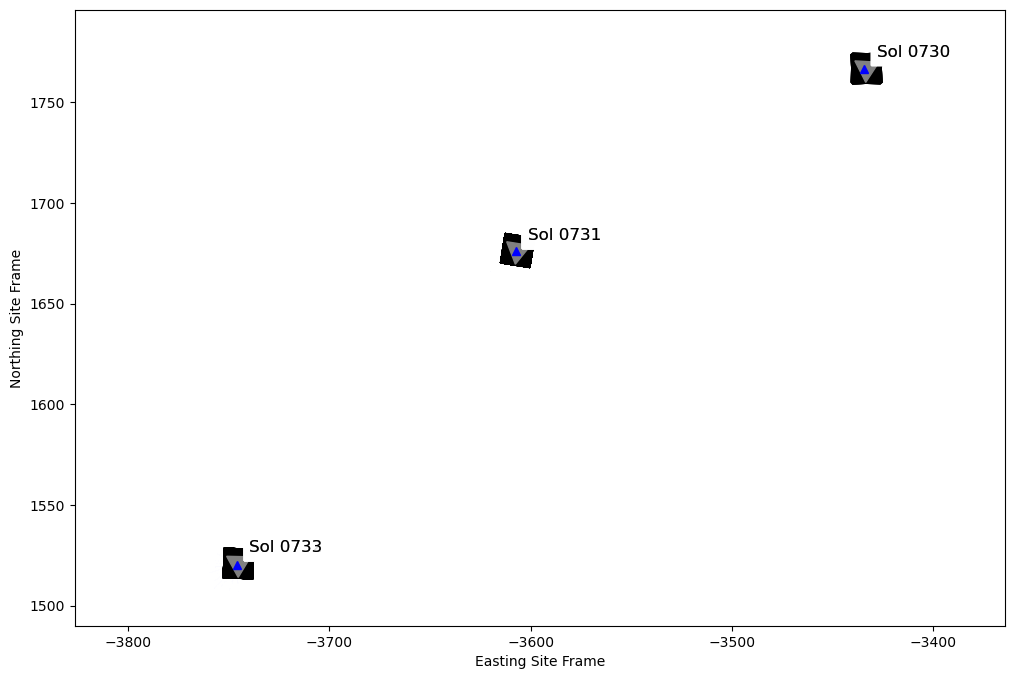

In [6]:
%run MPPP.py

# plot image and rover locations

plot_image_locations( IMG_paths, im_xyzs, rover_xyzs, rover_rots, im_azs, im_els )

In [7]:
def xyz_shift_offsets( site, drive ):
    
    '''
    xyz_shift_offsets finds most accurate Site-Nav offset for each site index and drive
    
    '''

    # print( site, drive )

    parent_path  = os.path.split( os.getcwd() )[0]
    waypoint_shift_path = os.path.join( parent_path, 'params/Mars2020_waypoint_shifts.csv' )

    shift_params = np.loadtxt( waypoint_shift_path, delimiter=',', skiprows=1 )

    site_shifts  = shift_params[ np.where( shift_params[:,1]==site)[0] ]
    site_drives  = site_shifts[:,2]

    if drive in site_drives:
        drive_site_shift = site_shifts[ np.where( site_shifts[:,2]==drive)[0] ][0,:]

    elif drive > site_drives.min() and drive < site_drives.max():
        drive_site_shift = interp1d( site_shifts[:,2], site_shifts, axis=0)(drive)

    elif drive >= site_drives.max():
        drive_site_shift = site_shifts[-1,:]

    else:
        drive_site_shift = np.zeros(12)

    # print( drive_site_shift )
    x_shift, y_shift, z_shift = drive_site_shift[9:]

    # x_shift, y_shift, z_shift = [ 0,0,0 ]
 
    return x_shift, y_shift, z_shift

# def xyz_shift_offsets_add( site, drive ):

In [8]:
import urllib.request, json 
waypoints_url = "https://mars.nasa.gov/mmgis-maps/M20/Layers/json/M20_waypoints.json"

with urllib.request.urlopen( waypoints_url ) as url:
    data = json.loads(url.read().decode())

In [9]:
site  = 34
drive = 0



site3_E = data['features'][0]['properties']['easting']
site3_N = data['features'][0]['properties']['northing']
site3_A = data['features'][0]['properties']['elev_geoid']


    
indexes = [] 
lines   = []

for i in range(len(data['features'])):
    
    site_i = data['features'][i]['properties']['site']
    
    if site_i == site:
        
        sol_i   =  data['features'][i]['properties']['sol']
        drive_i =  data['features'][i]['properties']['drive']
        E_i = np.float64(data['features'][i]['properties']['easting'])   - np.float64(site3_E)
        N_i = np.float64(data['features'][i]['properties']['northing'])  - np.float64(site3_N)
        A_i = np.float64(data['features'][i]['properties']['elev_geoid'])- np.float64(site3_A)
        
        line_i  =   '{}\t{}\t{}\t'.format(sol_i,site_i,drive_i)+\
                    '{:.3f}\t{:.3f}\t{:.3f}\t'.format(0,0,0)+\
                    '{:.3f}\t{:.3f}\t{:.3f}\t'.format( E_i, N_i, A_i )
           
        indexes.append( i )
        lines.append( line_i )
        
lines

['715\t34\t0\t0.000\t0.000\t0.000\t-2867.720\t1421.358\t82.962\t',
 '716\t34\t952\t0.000\t0.000\t0.000\t-2913.638\t1591.495\t86.760\t',
 '717\t34\t2098\t0.000\t0.000\t0.000\t-3005.175\t1762.912\t91.759\t',
 '718\t34\t3196\t0.000\t0.000\t0.000\t-3192.771\t1822.324\t94.970\t',
 '719\t34\t4394\t0.000\t0.000\t0.000\t-3402.497\t1838.044\t106.989\t',
 '721\t34\t5120\t0.000\t0.000\t0.000\t-3433.487\t1767.285\t110.875\t']

In [10]:
lines   = []

for i in range(len(data['features'])):
    
    sol_i   =  data['features'][i]['properties']['sol']
    site_i = data['features'][i]['properties']['site']
    drive_i =  data['features'][i]['properties']['drive']
    
    if drive_i == 0:        
        
        E_i = np.float64(data['features'][i]['properties']['easting'])   - np.float64(site3_E)
        N_i = np.float64(data['features'][i]['properties']['northing'])  - np.float64(site3_N)
        A_i = np.float64(data['features'][i]['properties']['elev_geoid'])- np.float64(site3_A)
        
#         line_i  =  '{}\t{}\t{}\t'.format(sol_i,site_i,drive_i)+\
#                     '{:.3f}\t{:.3f}\t{:.3f}\t'.format(0,0,0)+\
#                     '{:.3f}\t{:.3f}\t{:.3f}\t\n'.format( E_i, N_i, A_i )
        line_i  =  [ int(sol_i), int(site_i), int(drive_i), 0, 0, 0, '{:.3f}'.format(E_i), '{:.3f}'.format(N_i),  '{:.3f}'.format(A_i) ]
        print( line_i )
        lines.append( line_i )


[13, 3, 0, 0, 0, 0, '0.000', '0.000', '0.000']
[84, 4, 0, 0, 0, 0, '78.194', '-24.177', '0.610']
[130, 5, 0, 0, 0, 0, '47.200', '-525.883', '-0.724']
[157, 6, 0, 0, 0, 0, '42.959', '-1003.669', '-15.012']
[180, 7, 0, 0, 0, 0, '-366.571', '-823.192', '-4.614']
[248, 8, 0, 0, 0, 0, '-442.276', '-632.051', '0.756']
[286, 9, 0, 0, 0, 0, '-534.830', '-709.314', '-4.528']
[359, 10, 0, 0, 0, 0, '56.611', '-233.380', '0.191']
[361, 11, 0, 0, 0, 0, '87.262', '-43.457', '1.188']
[381, 12, 0, 0, 0, 0, '193.350', '258.971', '0.154']
[382, 13, 0, 0, 0, 0, '452.860', '389.596', '-1.292']
[385, 14, 0, 0, 0, 0, '621.342', '750.545', '1.089']
[387, 15, 0, 0, 0, 0, '601.229', '1176.533', '2.169']
[389, 16, 0, 0, 0, 0, '199.910', '1403.036', '6.720']
[394, 17, 0, 0, 0, 0, '71.503', '1397.758', '7.793']
[396, 18, 0, 0, 0, 0, '-277.375', '1348.107', '12.167']
[399, 19, 0, 0, 0, 0, '-664.104', '1151.764', '12.919']
[402, 20, 0, 0, 0, 0, '-1174.414', '947.725', '17.851']
[405, 21, 0, 0, 0, 0, '-1636.261', '7

## Ignore the notes below

In [11]:
# '''
# df_refs : pandas dataframe that holds reference info for each image

# data saves in the output directory as a CSV file 'df'+output+'.csv' and as a python pickle 'df'+output+'.pkl'

# '''

# df_refs = pd.DataFrame( 
#     columns = [ 
#         'sol',           # sol number or Mars day since landing is a natural way to describe images.
#         'site',          # site index for the rover's location, site 3 is the landing site
#         'drive',         # drive index is where the rover is relative to the current site frame
#         'time',          # datetime of image capture
        
#         'xyz_enu',       # postition XYZ values in meters ENU = [xEast, yNorth, zUp ] from site 3 (note: as Metashape interprets XYZ)
#         'xyz_ned',       # postition XYZ values in meters NED = [xNorth, yEast, zDown] from site 3
#         'rot_rpy',       # rotation angles in RPY = [roll, pitch, yaw] in degrees (as Metashape interprets roll-pitch-yaw)
#         'rot_ypr',       # rotation angles in YPR = [yaw, pitch, roll] in degrees 
#         'rot_opk',       # rotation angles in OPK = [omega, phi, kappa] in degrees 
        
#         'site_wy',       # waypoint site index, same as the current site if 'site_wy' == 'site' 
#         'drive_wp',      # waypoint drive index, same as the current drive if 'drive_wy' == 'drive'      
#         'xyz_wp',        # waypoint postition XYZ values in meters NED = [xNorthing, yEasting, zElevation]
#         'xyz_site3'      # postition of site3 (OEB landing site) in meters NED = [xNorth, yEast, zDown], 'xyz_site3'=[0,0,0] if site3 is the default reference frame
#         'nee_site3'      # postition of site3 (OEB landing site) in meters NED = [xNorthing, yEasting, zElevation]
#         'lle_site3'      # postition in [longitude, latitude, elevation] Mars global coordinates        
       
#         'cahvor',        # the CAHVOR or CAHVORE camera model in rover frame [xFront, yRight, zDown]
#         'az_site',       # site-frame azimuth pointing in degrees clockwise from the North vector 
#         'el_site',       # site-frame elevation pointing in degrees positive from the horizone
#         'az_rover',      # rover-frame azimuth pointing in degrees clockwise from the rover's forward vector
#         'el_rover',      # rover-frame elevation pointing in degrees positive from the forward-right plane       
        
#         'ref',           # string that forms the image's line in the reference file for import to software (Metashape)
#         'filename',      # file name with .IMG extension
#         'filepath',      # complete file path to image at run time
# ])


# df_refs

In [12]:
# ignore the below cells

In [13]:
# For find_offset_mode = 1

# # pos_lines  = []
# # rover_xyzs = []
# # im_xyzs    = []
# # sols       = []
# # rmcs = []
sites  = [ rmcs[i][0] for i in range(len(rmcs))[::-1] ]
drives = [ rmcs[i][1] for i in range(len(rmcs))[::-1] ]
Xs     = [ rover_xyzs[i][0] for i in range(len(rover_xyzs))[::-1] ]
Ys     = [ rover_xyzs[i][1] for i in range(len(rover_xyzs))[::-1] ]
Zs     = [ rover_xyzs[i][2] for i in range(len(rover_xyzs))[::-1] ]

table = np.stack( [sols[::-1], sites, drives, Xs, Ys, Zs], axis=1)
np.round( table, 4 )

np.savetxt( directory_output+"/offsets.csv", table, delimiter="\t")

In [14]:
# Scam flatfield

path = 'C:/Users/cornell/Mastcam-Z/ws/seitah'
pre = 'L*_0510*'

RAD_paths = [] \
          + sorted( glob.glob(  path + '/' +pre+'*R*_N*.IMG' ) ) \

RAD_paths

ims = []
for i in range(len(RAD_paths))[:]:
    
    im_image = PDS3Image.open( RAD_paths[i] ).image
    ims.append( np.float64( im_image) )
    
flat = np.mean( ims, axis=0)
for i in range(3):
    flat[:,:,i] /= np.mean( flat[700:-700,700:-700,i] )
    
plt.imshow( flat/1.5 )

C:\Users\cdt59\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\cdt59\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IndexError: invalid index to scalar variable.

In [ ]:
x = np.arange(0, 2048)
y = np.arange(0, 2048)
xv, yv = np.meshgrid(x, y)

y0, x0, r0, p = [900,1000,1000,3]
dv = ( (xv-x0)**2 + (yv-y0)**2 )**(p/2)
dv /= (r0**p)*2
dv += 1

# lim = .8
# dv[ dv<lim]  =lim

dflat = flat.copy()
for i in range(3):
    dflat[:,:,i] *= dv
    
plt.imshow( dflat/2 )
plt.colorbar()

In [ ]:
dvl = np.mean( dflat[:,1000:1300], axis=1)
plt.plot(dvl)

dvl = np.mean( flat[:,1000:1300], axis=1)
plt.plot(dvl)
# flat = dflat.copy()

In [ ]:
import urllib.request, json 

'''

https://mars.nasa.gov/mmgis-maps/M20/Layers/json/M20_waypoints.json

https://docs.google.com/spreadsheets/d/1GSNJL-e5iROCaKUC4BXL_OA8hWy8vUdfCN7levRNkZA/edit#gid=1232397498

''' 
# path =  'C:/Users/cornell/Downloads/M20_waypoints.json'
# with open( path ) as f:
#     data = json.load(f)

with urllib.request.urlopen("https://mars.nasa.gov/mmgis-maps/M20/Layers/json/M20_waypoints.json") as url:
    data = json.loads(url.read().decode())

    
site3_E = data['features'][0]['properties']['easting']
site3_N = data['features'][0]['properties']['northing']
site3_A = data['features'][0]['properties']['elev_geoid']


for i in range(len(data['features']))[::-1]:
    
    print( data['features'][i]['properties']['sol'],'\t',
           data['features'][i]['properties']['site'], '\t',
           data['features'][i]['properties']['drive'],'\t',
           ''+'\t',''+'\t',''+'\t',
           np.round( np.float64(data['features'][i]['properties']['easting'])- np.float64(site3_E), 3),'\t',
           np.round( np.float64(data['features'][i]['properties']['northing'])- np.float64(site3_N), 3),'\t',
           np.round( np.float64(data['features'][i]['properties']['elev_geoid'])- np.float64(site3_A), 3),'\t',
         )